<a href="https://colab.research.google.com/github/catiefuentes/portfolio/blob/main/RevisedConstructionApprenticeProgramSponsors%26Signatories_Oct_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df= pd.read_csv("apprenticeship_signatories.csv")  # Internal data


In [ ]:
# Basic info about the dataset
print("Dataset Information:")
print(df.info())

# First few rows
print("\n First 5 Rows of the Dataset:")
print(df.head())

# Summary statistics (for numerical & categorical columns)
print("\n Summary Statistics:")
print(df.describe(include="all"))

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39122 entries, 0 to 39121
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sponsor               39122 non-null  object
 1   Trade                 39122 non-null  object
 2   Signatory Name        39121 non-null  object
 3   Signatory Address     39084 non-null  object
 4   City                  39067 non-null  object
 5   State                 39114 non-null  object
 6   Zip Code              39122 non-null  object
 7   Date Signatory Added  39122 non-null  object
 8   Source                39122 non-null  object
dtypes: object(9)
memory usage: 2.7+ MB
None

 First 5 Rows of the Dataset:
                                            Sponsor      Trade  \
0  Associated Builders and Contractors Empire State  Carpenter   
1  Associated Builders and Contractors Empire State  Carpenter   
2  Associated Builders and Contractors Empire S

## Cleaning the data

In [ ]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Fill missing values
df.fillna({
    "signatory_name": "Unnamed Signatory",
    "signatory_address": "Unknown Address",
    "city": "Unknown City",
    "state": "Unknown State",
}, inplace=True)

# Convert "Date Signatory Added" to datetime format
df["date_signatory_added"] = pd.to_datetime(df["date_signatory_added"], errors="coerce")

# Verify changes
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39122 entries, 0 to 39121
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sponsor               39122 non-null  object        
 1   trade                 39122 non-null  object        
 2   signatory_name        39122 non-null  object        
 3   signatory_address     39122 non-null  object        
 4   city                  39122 non-null  object        
 5   state                 39122 non-null  object        
 6   zip_code              39122 non-null  object        
 7   date_signatory_added  39121 non-null  datetime64[ns]
 8   source                39122 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 2.7+ MB
None
                                            sponsor      trade  \
0  Associated Builders and Contractors Empire State  Carpenter   
1  Associated Builders and Contractors Empire State  Carpe

## Fixing State Errors

In [ ]:
df['state'].unique()

array(['NY', 'PA', 'FL', 'NJ', 'TX', 'MA', 'IA', 'OH', 'AR', 'MI', 'VT',
       'MD', 'CT', 'CA', 'Ne', 'Ny', 'DE', 'IL', 'GA', 'WV', 'XX', 'MN',
       'VA', 'OR', 'TN', 'WI', 'IN', 'Pa', 'AZ', 'N', 'NH', 'MO', 'ME',
       'CO', 'RI', 'UT', 'NC', 'SC', 'SD', 'NM', 'NE', 'KS', 'WA', 'NV',
       'ID', 'ND', 'KY', 'AL', 'LA', 'NU', 'AK', 'Co', 'CN', 'OK', 'ON',
       'MS', 'Y', 'QC', 'BC', 'CD', 'P.', 'Ct', 'Oh', 'Il', 'Ca', 'MT',
       'Unknown State', 'Va', 'nj', 'ny', 'MJ', 'Mo', 'N.'], dtype=object)

In [ ]:
# Capitalize all state abbreviations (for consistency)
df['state'] = df['state'].str.upper()

# Verify changes
print(df['state'].value_counts())  # Check updated state counts

state
NY    22234
NJ     9597
PA     2036
CT      601
MA      597
      ...  
P.        1
ID        1
SD        1
MJ        1
N.        1
Name: count, Length: 61, dtype: int64


In [ ]:
# Define the list of valid U.S. states
us_states = [
    'NY', 'NJ', 'PA', 'CT', 'MA', 'MD', 'OH', 'VA', 'DE', 'RI', 'NH', 'VT', 'ME',
    'FL', 'CA', 'IL', 'TX', 'GA', 'NC', 'SC', 'MI', 'IN', 'WI', 'MN', 'MO', 'CO',
    'WA', 'OR', 'AZ', 'NV', 'TN', 'KY', 'WV', 'NE', 'SD', 'ND', 'OK', 'AR', 'MS',
    'AL', 'LA', 'IA', 'KS', 'ID', 'MT', 'WY', 'UT', 'NM', 'AK', 'HI'
]

# List of Canadian provinces and territories
canada_provinces = [
    'AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT'
]


In [ ]:
# If the City column contains "Ontario", change State to "CD"
df.loc[df['city'].str.contains('Ontario', case=False, na=False), 'state'] = 'ON'

# Verify changes
print(df['state'].value_counts())  # Check updated state counts

state
NY    22211
NJ     9597
PA     2036
CT      601
MA      597
OH      435
FL      349
MI      264
IL      256
CA      253
MD      213
TX      211
MN      211
WI      196
MO      166
GA      154
NC      111
IN      108
VA      104
TN       83
DE       81
CO       80
KY       68
NH       67
RI       61
ON       55
KS       49
UT       44
VT       35
AZ       35
NV       35
OR       33
ME       32
AL       29
LA       28
WA       28
OK       26
SC       25
IA       24
AR       23
WV       22
NE       21
MT        9
CD        8
XX        7
QC        7
MS        5
Y         5
BC        5
N         4
NM        3
ND        2
NU        2
AK        2
MJ        1
CN        1
SD        1
P.        1
ID        1
N.        1
Name: count, dtype: int64


In [ ]:
# Identify any state values that are NOT in US or Canada lists
invalid_states_df = df[
    ~df['state'].isin(us_states + canada_provinces)
]

# Display incorrect state values for review
print("Rows with Potential State Errors:")
print(invalid_states_df[['signatory_name', 'city', 'state', 'zip_code']])

Rows with Potential State Errors:
                                          signatory_name               city  \
1668                                 BETONS PREFABRIQUES             CANADA   
4460   Capital District Sheet Metal & Air Conditionin...            Colonie   
4472                          Kleeberg Sheet Metal, Inc.       Ballston Spa   
4597                         Alliance Store Fixtures Inc             Canada   
4679                             Builders Furniture Ltd.     Canada R2K 1M4   
4708                              Canus Construction Inc      Canada T5L2H7   
4878                           Ebenisterie Beaubois Ltd.      Saint-Georges   
4967                           Gall Const Of America Ltd      Canada N2B3E2   
5578                       Sport Systems Unlimited Corp.             Canada   
8125                                  MAX BUILDERS, INC.      RICHMOND HILL   
8708                                  MAX BUILDERS, INC.      RICHMOND HILL   
9292              

In [ ]:
# Dictionary mapping zip codes (as strings) to correct state values
zip_to_state = {
    '11418': 'NY',
    '12205': 'NY',
    '12020': 'NY',
    '15317': 'PA',
    '14057': 'NY',
    '10550': 'NY',
    '11101': 'NY',
    '07470': 'NJ',
    '06608': 'CT'
}

# Ensure Zip Code is treated as a string in the DataFrame
df['zip_code'] = df['zip_code'].astype(str)

# Replace State based on Zip Code mapping
df['state'] = df.apply(
    lambda row: zip_to_state[row['zip_code']] if row['zip_code'] in zip_to_state else row['state'],
    axis=1
)

# Verify changes
print(df[df['zip_code'].isin(zip_to_state.keys())][['signatory_name', 'state', 'zip_code']])

                      signatory_name state zip_code
65                        WM Schultz    NY    12020
265          WM Schultz Construction    NY    12020
385          WM Schultz Construction    NY    12020
504          WM Schultz Construction    NY    12020
660          WM Schultz Construction    NY    12020
...                              ...   ...      ...
39106       TECHNICAL BUILDING SRVCS    NY    12020
39109            VERDE ELECTRIC CORP    NY    10550
39110       VORCOM INTERNET SERVICES    NY    10550
39117  WM Schultz Construction, Inc.    NY    12020
39118  WM Schultz Construction, Inc.    NY    12020

[1100 rows x 3 columns]


In [ ]:
# Dictionary mapping company names to correct City, State, and Zip Code
company_location_fix = {
    "BETONS PREFABRIQUES": ("Alma", "QC", "G8B 7R3"),
    "Alliance Store Fixtures Inc": ("Woodbridge", "ON", "L4H 0R4"),
    "Builders Furniture Ltd.": ("Winnipeg", "MB", "R2K 1M4"),
    "Canus Construction Inc": ("Edmonton", "AB", "T5L 2H7"),
    "Ebenisterie Beaubois Ltd.": ("Saint-Georges", "QC", "G5Y 0H1"),
    "Gall Const Of America Ltd": ("Canada N2B3E2", "ON", "N2B 3E2")
}

# Apply the corrections based on Signatory Name
for company, (city, state, zip_code) in company_location_fix.items():
    df.loc[df['signatory_name'] == company, ['city', 'state', 'zip_code']] = city, state, zip_code

# Verify changes
print(df[df['signatory_name'].isin(company_location_fix.keys())][['signatory_name', 'city', 'state', 'zip_code']])

                   signatory_name           city state zip_code
1668          BETONS PREFABRIQUES           Alma    QC  G8B 7R3
4597  Alliance Store Fixtures Inc     Woodbridge    ON  L4H 0R4
4679      Builders Furniture Ltd.       Winnipeg    MB  R2K 1M4
4708       Canus Construction Inc       Edmonton    AB  T5L 2H7
4878    Ebenisterie Beaubois Ltd.  Saint-Georges    QC  G5Y 0H1
4967    Gall Const Of America Ltd  Canada N2B3E2    ON  N2B 3E2


In [ ]:
#update ONLY row 5578
df.loc[5578, ['city', 'state', 'zip_code']] = "Waterloo", "ON", "N2L 5Z4"

## Checking other unknown values


In [ ]:
df.columns

Index(['sponsor', 'trade', 'signatory_name', 'signatory_address', 'city',
       'state', 'zip_code', 'date_signatory_added', 'source'],
      dtype='object')

In [ ]:
unknown_cities = df[df["city"].str.contains("Unknown", case=False, na=False)]

# Display the filtered results
print(unknown_cities[["signatory_name"]])

                       signatory_name
1512              MAZTEC CONSTRUCTION
6662              MILTON WELDING INC.
11965          Cabrini of Westchester
13883  AAA Refrigeration Service Inc.
13884             Matco Service Corp.
15861            Posillico-Skanska JV
16927        Inifinty Hardwood Floors
17292           Mele Construction LLC
17427                    NJ Floor LLC
17934               THE COURT COMPANY
17964                       TIME LOSS
18136            WORKERS COMPENSATION
21944        Inifinty Hardwood Floors
21945        Inifinty Hardwood Floors
21946        Inifinty Hardwood Floors
21947        Inifinty Hardwood Floors
23411           Mele Construction LLC
23412           Mele Construction LLC
23413           Mele Construction LLC
23414           Mele Construction LLC
23953                    NJ Floor LLC
23954                    NJ Floor LLC
23955                    NJ Floor LLC
23956                    NJ Floor LLC
26000               THE COURT COMPANY
26001       

In [ ]:
unknown_zipcodes = df[df["zip_code"].str.contains('00000', case=False, na=False)]

# Display the filtered results
print(unknown_zipcodes[["signatory_name"]])

                      signatory_name
1512             MAZTEC CONSTRUCTION
1605            Viki Stucco Co., LLC
1652                A G R STONE LLC.
1656    A.L.L. INDUSTRIAL SEVS. INC.
1657          AAH CONSTRUCTION CORP.
...                              ...
38610                       SYNATECH
38611               TAC PAVING CORP.
38614  TRI-MESSINE CONSTRUCTION CORP
38615         TRI-STATE PAVING OF NY
38616     TRIUMPH CONSTRUCTION CORP.

[276 rows x 1 columns]


In [ ]:
unknown_address = df[df["signatory_address"].str.contains("Unknown", case=False, na=False)]

# Display the filtered results
print(unknown_address[["signatory_name"]])

                                          signatory_name
1512                                 MAZTEC CONSTRUCTION
6473                 CONVENTIONAL STONE AND MARBLE CORP.
6507              DRYWALL & ACOUSTICS OF NORTHEAST, INC.
6537              FONDELCO INC. T/A PREMIER FIRESTOPPING
6550    GLENMAN INDUSTRIAL & COMMERCIAL CONTRACTOR CORP.
6560                      Henegan Construction Co., Inc.
6639   M K M CONSTRUCTION SERVICES...SCA PLA Only...S...
6662                                 MILTON WELDING INC.
6669           NACIREMA Environmental Services Co., Inc.
6753                                    S B S Steel Inc.
6757       S. N. TANNOR, INC. (SCA PLA Only - See Notes)
6831                                 V. A. L. FLOORS INC
11965                             Cabrini of Westchester
15861                               Posillico-Skanska JV
16927                           Inifinty Hardwood Floors
17934                                  THE COURT COMPANY
17964                          

## Exploring the data

In [ ]:
# Count total unique sponsors
print(f"Total Unique Sponsors: {df['sponsor'].nunique()}")

# Count total unique trades
print(f"Total Unique Trades: {df['trade'].nunique()}")

# Most common trade
print("Most Common Trades:\n", df["trade"].value_counts().head(10))

# Most common signatories
print("Most Common Signatories:\n", df["signatory_name"].value_counts().head(10))

# Most active states
print("Most Active States:\n", df["state"].value_counts().head(10))

# Distribution of signatories over time
print(df["date_signatory_added"].describe())


Total Unique Sponsors: 415
Total Unique Trades: 68
Most Common Trades:
 trade
Carpenter                                    10206
Skilled Construction Craft Laborer            3556
Carpenter(Piledriver/Dockbuilder              2432
Linoleum, Resilient Tile and Carpet Layer     2256
Cabinetmaker                                  2210
Lather (Carpenter)                            2146
Optg. Engineer (Heavy Equipment)              1551
Electrician                                   1355
Optg. Engineer (Universal Equipment)          1014
Bricklayer Mason and Plasterer                 986
Name: count, dtype: int64
Most Common Signatories:
 signatory_name
C&S Technical Resources, Inc           27
Barber Corporation                     24
Ganem Contracting Corp.                23
CIP Concrete, Inc.                     21
MTP Construction Corp.                 21
Friend Commercial Contracting Corp.    21
Alliance Masonry Corp.                 21
Heritage Homes Inc.                    20
C&S Techn

## Top 10 most common trades

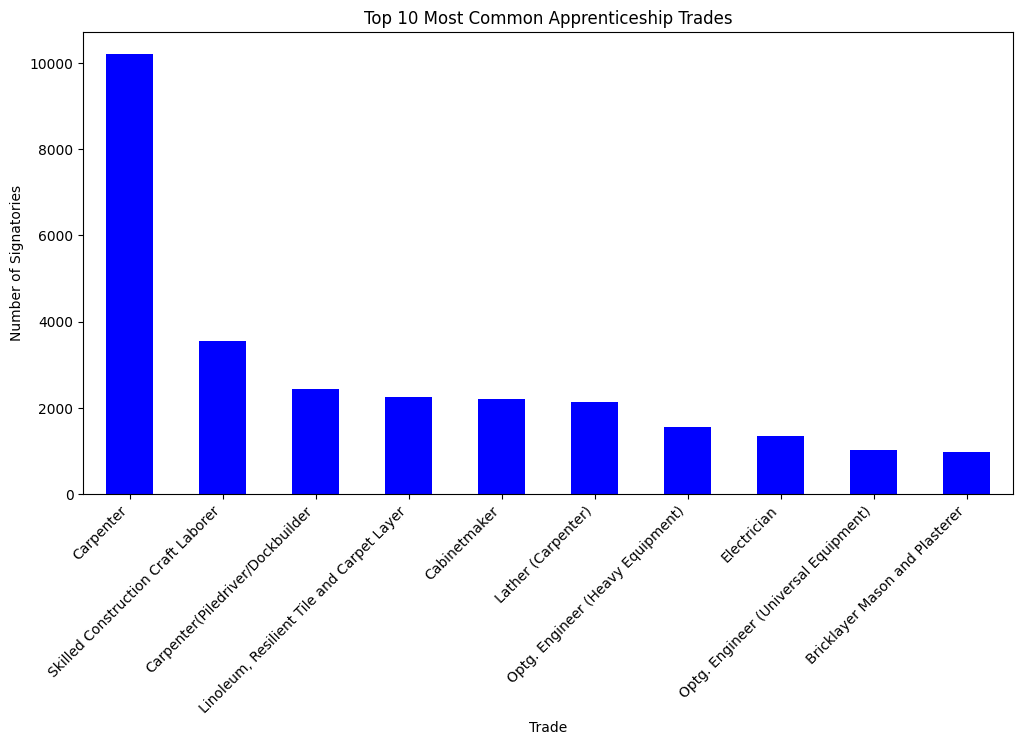

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df["trade"].value_counts().head(10).plot(kind="bar", color="blue")
plt.xlabel("Trade")
plt.ylabel("Number of Signatories")
plt.title("Top 10 Most Common Apprenticeship Trades")
plt.xticks(rotation=45, ha="right")
plt.show()


## Distribution of signatories over time

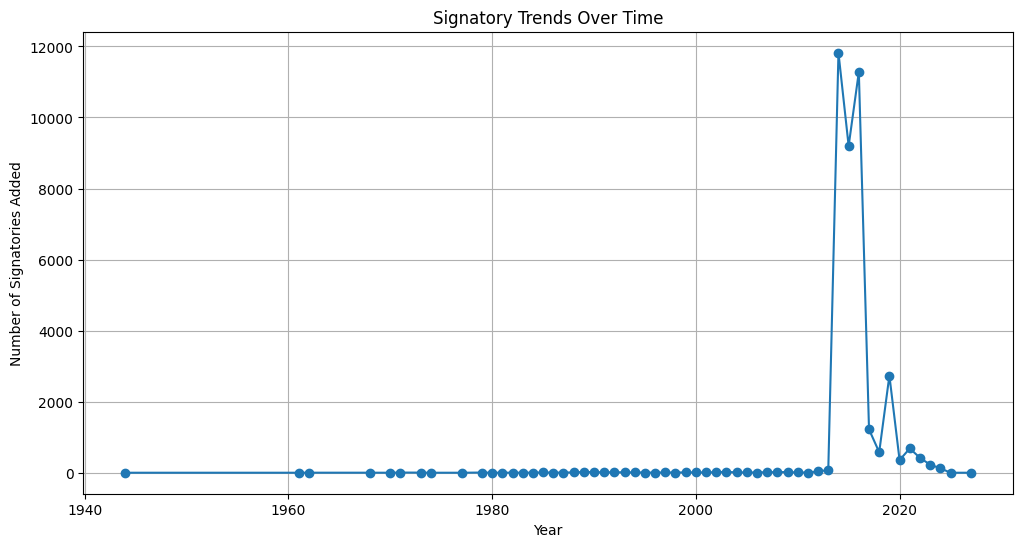

In [ ]:
plt.figure(figsize=(12, 6))
df["date_signatory_added"].dt.year.value_counts().sort_index().plot(kind="line", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Signatories Added")
plt.title("Signatory Trends Over Time")
plt.grid()
plt.show()


## Top 10 most active states

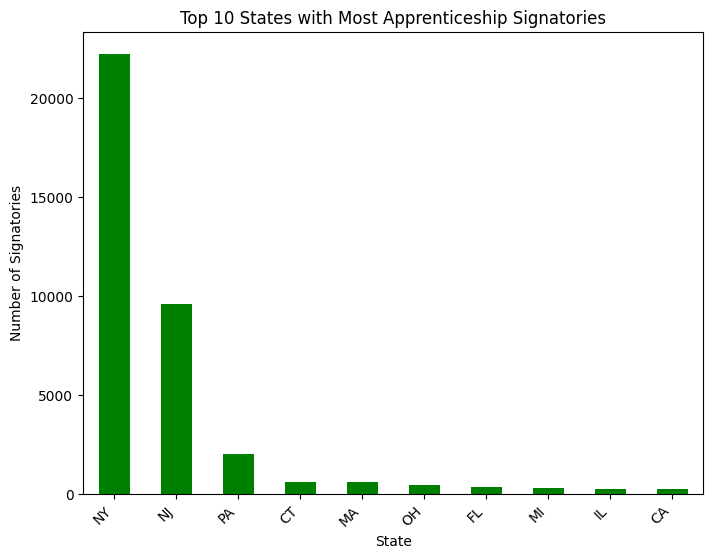

In [ ]:
plt.figure(figsize=(8, 6))
df["state"].value_counts().head(10).plot(kind="bar", color="green")
plt.xlabel("State")
plt.ylabel("Number of Signatories")
plt.title("Top 10 States with Most Apprenticeship Signatories")
plt.xticks(rotation=45, ha="right")
plt.show()